In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.optimizers import SGD

encoder = Sequential([
    (Flatten(input_shape=[28,28])),
    (Dense(400,activation="relu")),
    (Dense(200,activation="relu")),
    (Dense(100,activation="relu")),
    (Dense(50,activation="relu")),
    (Dense(25,activation="relu"))  # Going down to 25 dimensions out of 784 (28*28)
])

In [6]:
decoder = Sequential([
    (Dense(50,input_shape=[25],activation='relu')),
    (Dense(100,activation='relu')),
    (Dense(200,activation='relu')),
    (Dense(400,activation='relu')),
    (Dense(28 * 28, activation="sigmoid")), # Only two possibilities, does output image match input's image
    # or not?
    (Reshape([28, 28]))  # Converting 1D data back to 2D
])

In [7]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy", optimizer=SGD(learning_rate=1.5), metrics=['accuracy'])

In [8]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2463 - accuracy: 0.0946 - val_loss: 0.2041 - val_accuracy: 0.1416
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1758 - accuracy: 0.1760 - val_loss: 0.1598 - val_accuracy: 0.2008
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1532 - accuracy: 0.2097 - val_loss: 0.1435 - val_accuracy: 0.2167
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1426 - accuracy: 0.2220 - val_loss: 0.1344 - val_accuracy: 0.2293
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1353 - accuracy: 0.2317 - val_loss: 0.1371 - val_accuracy: 0.2303


In [9]:
passed_images = autoencoder.predict(X_test[:10])

Original image


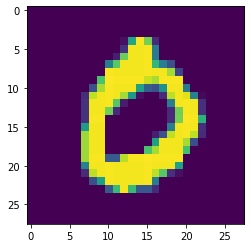

Image from the autoencoder


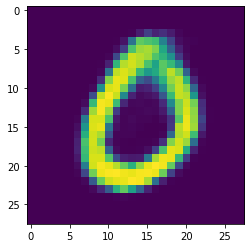

In [10]:
n = 3

print('Original image')
plt.imshow(X_test[n])
plt.show()
print('Image from the autoencoder')
plt.imshow(passed_images[n])

In [11]:
from tensorflow.keras.layers import GaussianNoise

sample = GaussianNoise(0.2)

noisey = sample(X_test[:10], training=True)

Original image


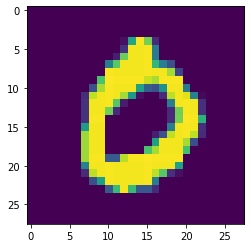

Noisey version


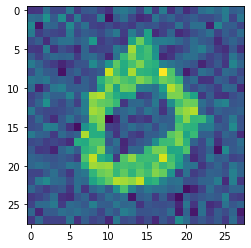

In [13]:
n = 3

print('Original image')
plt.imshow(X_test[n])
plt.show()
print('Noisey version')
plt.imshow(noisey[n])

# Making Noise Removal Autoencoder

In [14]:
encoder = Sequential([
    (Flatten(input_shape=[28,28])),
    
    (GaussianNoise(0.2)),
    
    (Dense(400,activation="relu")),
    (Dense(200,activation="relu")),
    (Dense(100,activation="relu")),
    (Dense(50,activation="relu")),
    (Dense(25,activation="relu"))  # Going down to 25 dimensions out of 784 (28*28)
])

In [15]:
decoder = Sequential([
    (Dense(50,input_shape=[25],activation='relu')),
    (Dense(100,activation='relu')),
    (Dense(200,activation='relu')),
    (Dense(400,activation='relu')),
    (Dense(28 * 28, activation="sigmoid")), # Only two possibilities, does output image match input's image
    # or not?
    (Reshape([28, 28]))  # Converting 1D data back to 2D
])

In [16]:
noise_remover = Sequential([encoder, decoder])

noise_remover.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [17]:
noise_remover.fit(X_train, X_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 15s 7ms/step - loss: 0.1781 - accuracy: 0.1753
Epoch 2/8
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1374 - accuracy: 0.2296
Epoch 3/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1268 - accuracy: 0.2429
Epoch 4/8
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1216 - accuracy: 0.2499
Epoch 5/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1176 - accuracy: 0.2554
Epoch 6/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1145 - accuracy: 0.2605
Epoch 7/8
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1119 - accuracy: 0.2640
Epoch 8/8
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1098 - accuracy: 0.2667


In [18]:
noisey_images = sample(X_test[:10], training=True)

In [19]:
denoised_images = noise_remover(noisey_images)

Original image


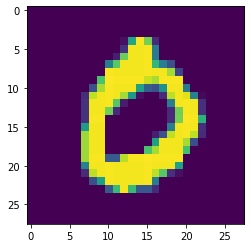

Noisey version


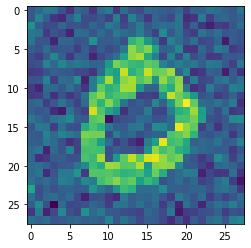

Denoised version


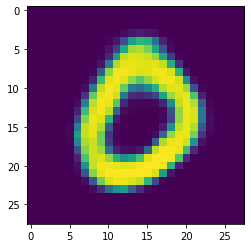

In [21]:
n = 3

print('Original image')
plt.imshow(X_test[n])
plt.show()
print('Noisey version')
plt.imshow(noisey_images[n])
plt.show()
print('Denoised version')
plt.imshow(denoised_images[n])